# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project: Building a Student Intervention System

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail to graduate. Which type of supervised learning problem is this, classification or regression? Why?*

**Answer: ** This is a classification problem. We are looking to pick out students that need intervention. Students are discrete entities with certain attributes or features like exam scores, attendance record, homework completion etc.

## Exploring the Data
Run the code cell below to load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score

# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"

Student data read successfully!


### Implementation: Data Exploration
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [2]:
# TODO: Calculate number of students
n_students = student_data.shape[0]

# TODO: Calculate number of features
n_features = student_data.shape[1]-1

# TODO: Calculate passing students
n_passed = len(student_data[student_data["passed"] == "yes"].index.tolist())

# TODO: Calculate failing students
n_failed = n_students - n_passed # Assuming all students that didnt pass have failed

# TODO: Calculate graduation rate
grad_rate = n_passed/(n_students+0.0)*100.0

# Print the results
print "Total number of students: {}".format(n_students)
print "Number of features: {}".format(n_features)
print "Number of students who passed: {}".format(n_passed)
print "Number of students who failed: {}".format(n_failed)
print "Graduation rate of the class: {:.2f}%".format(grad_rate)

Total number of students: 395
Number of features: 30
Number of students who passed: 265
Number of students who failed: 130
Graduation rate of the class: 67.09%


## Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Run the code cell below to separate the student data into feature and target columns to see if any features are non-numeric.

In [3]:
# Extract feature columns
feature_cols = list(student_data.columns[:-1])

# Extract target column 'passed'
target_col = student_data.columns[-1] 

# Show the list of columns
print "Feature columns:\n{}".format(feature_cols)
print "\nTarget column: {}".format(target_col)

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = student_data[feature_cols]
y_all = student_data[target_col]

# Show the feature information by printing the first five rows
print "\nFeature values:"
print X_all.head()

Feature columns:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column: passed

Feature values:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

    ...    higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0   ...       yes       no        no       4         3     4    1    1      3   
1   ...       

### Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [4]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print "Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns))
print list(X_all.columns)[32]

Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']
failures


### Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. In the following code cell below, you will need to implement the following:
- Randomly shuffle and split the data (`X_all`, `y_all`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [5]:
# TODO: Import any additional functionality you may need here

# TODO: Set the number of training points
num_train = 300

# Set the number of testing points
num_test = X_all.shape[0] - num_train

# TODO: Shuffle and split the dataset into the number of training and testing points above
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_all,y_all,test_size=0.24,stratify=y_all, random_state=1)


# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 300 samples.
Testing set has 95 samples.


## Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data (100 data points, 200 data points, and 300 data points) and measure the F<sub>1</sub> score. You will need to produce three tables (one for each model) that shows the training set size, training time, prediction time, F<sub>1</sub> score on the training set, and F<sub>1</sub> score on the testing set.

**The following supervised learning models are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

# Choice of Classifier
I am summarizing my thoughts on the choice of classifier for this problem here:

### 1. Naive Bayes
Naive Bayes, generally is a good classifier, that is flexible and does not suffer from over-fitting. However, Naive Bayes works on the assumption that the features are conditionally independent. I feel this assumption might be a little too strong for use in this project. (Is there a way to identify (conditional) dependence between features in the dataset???) I used calibration in this case, but I would like to explore ways to identify patterns. 

GaussianNB:  =  : F1 score = 0.75
GaussianNB__


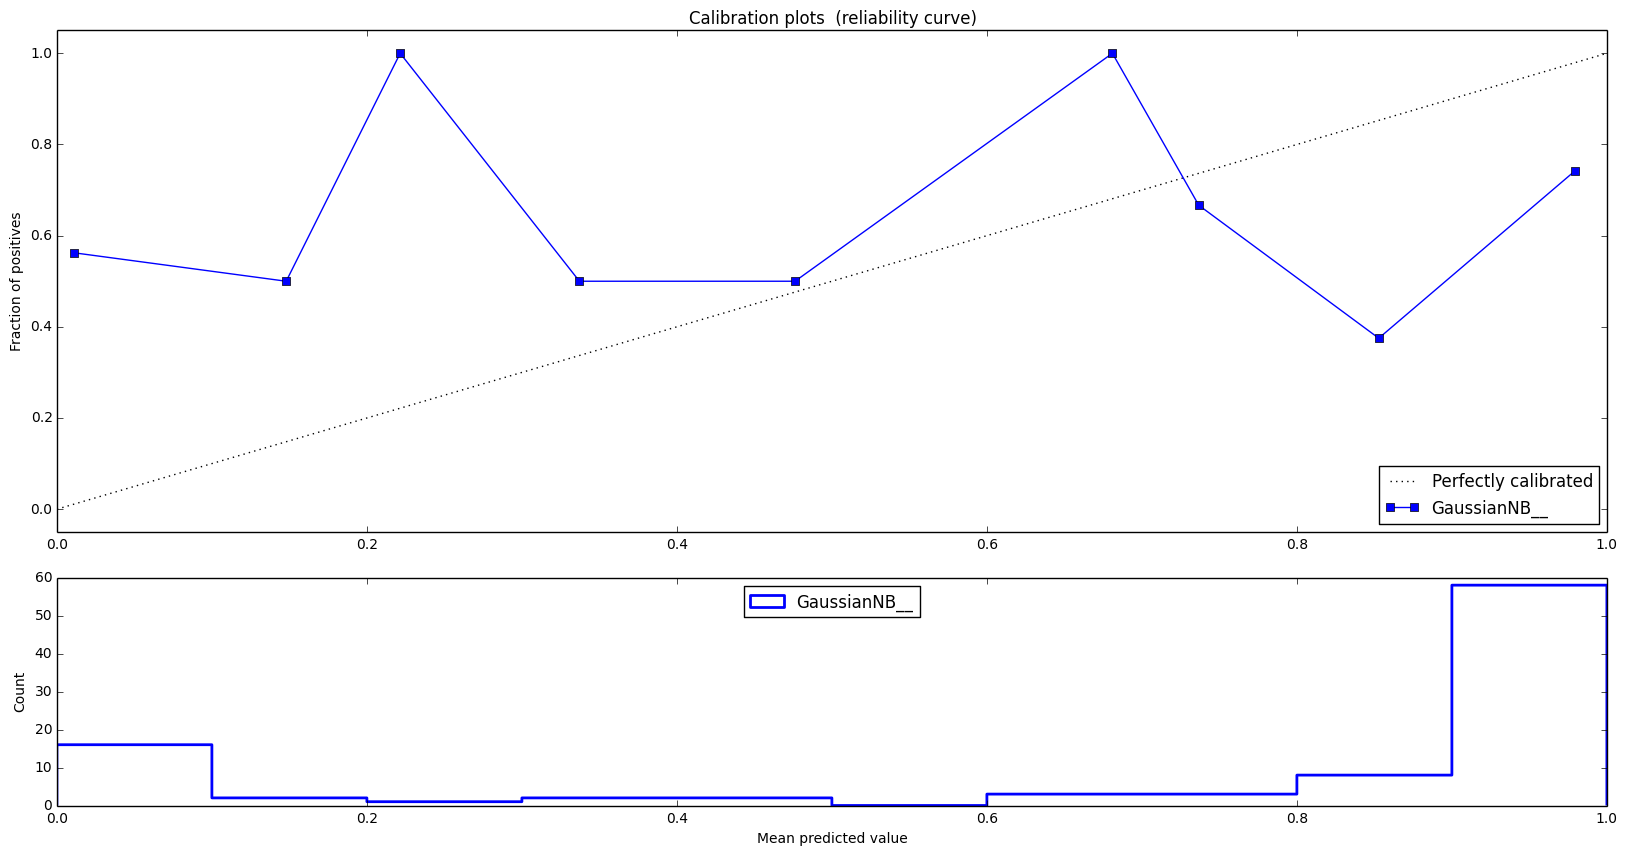

In [6]:
%matplotlib inline
import Classifiers as CLFRS
CLFRS.fitData(X_train,y_train,X_test,y_test,"GaussianNB")

The F1 score is pretty low at 0.672.
The calibration plot gives an indication of the confidence level of the prediction. In essence, the dotted line on the top plot represents the ideal case where the prediction probability (predict_proba) of the classifier is the same as the confidence level. For the NaiveBayes classifier, there is no correlation between the predict_proba and the prediction accuracy of the classifier. This shows that the Classifier is not a good fit for this problem. One reason could be that the assumption on conditional independence could be violated.

### 2. Decision Tree
Decision trees are a class of non-parametric classifiers that are flexible and expressive. Because of the parameteric nature, decision trees have a lower training time but a significantly higher run time. A major disadvantage of decision trees is over-fitting of data.
This can be prevented by pruning the tree and or using a different metric for information gain. The sklearn libraries allows 2 representations: gini score and entropy. Both are summarized below.



DecisionTree:  =  : F1 score = 0.723404255319
DecisionTree__


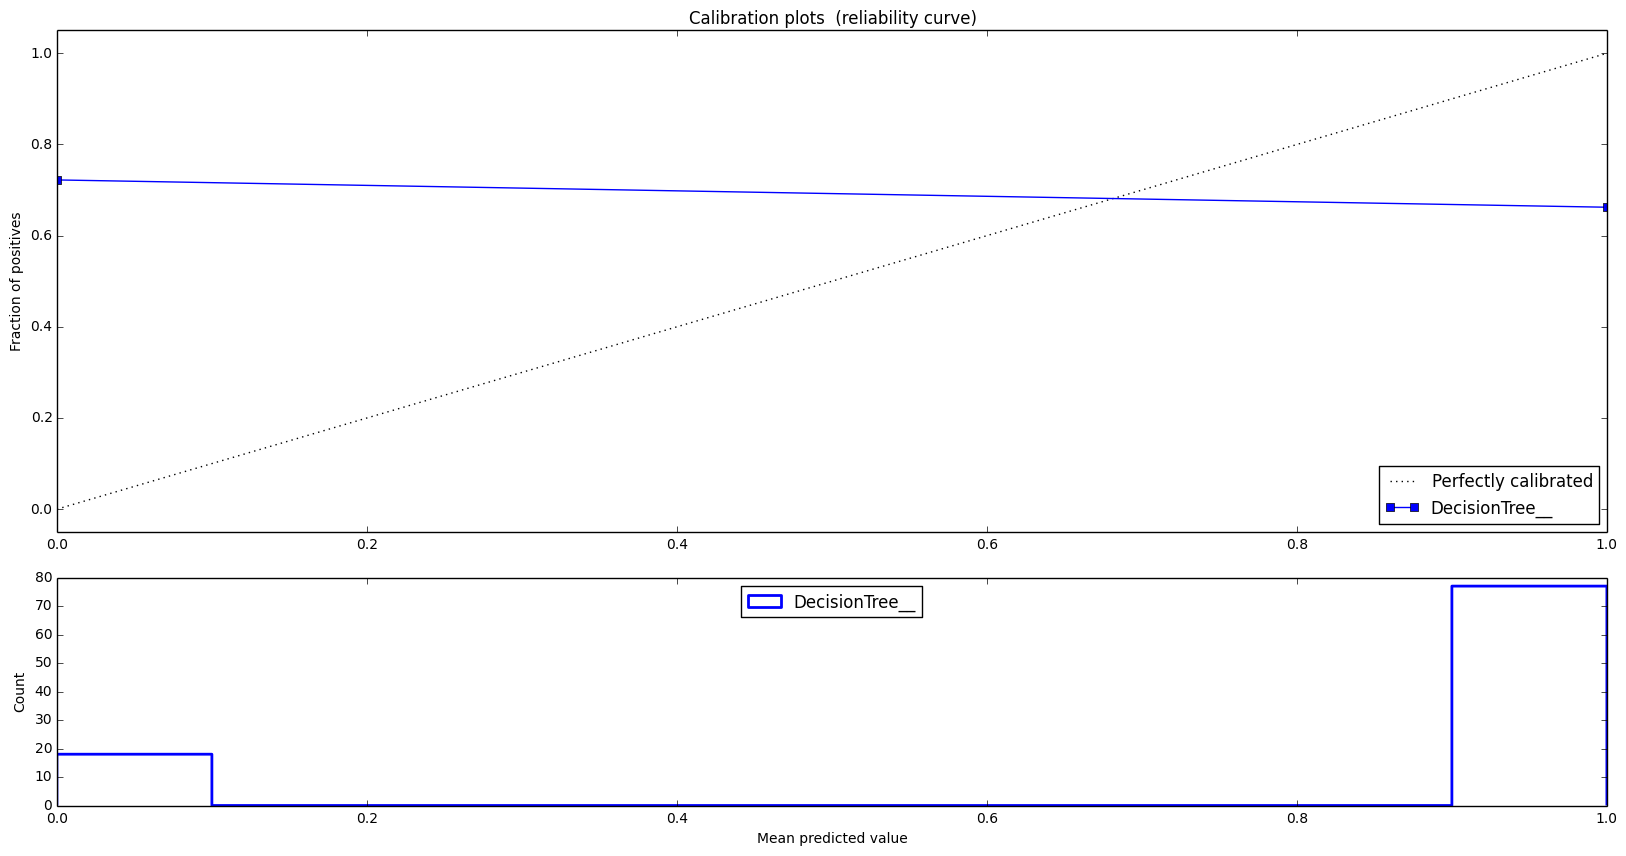

In [7]:
CLFRS.fitData(X_train,y_train,X_test,y_test,"DecisionTree")

The decision tree classifier performs slightly poorly compared to the GaussianNB. The max_depth is not set, which means that the tree was developed till all the leaves were reached. This score can definitely be improved by pruning the tree, since decision trees with full depth are prone to overfitting.

For the DecisionTree classifier, it is expected that the F1 score increases with decreasing max_depth. This is a clear indication that the classifier is over-fitting the data with more depth in the decision tree. In the above, the gini score is used as the metric with which the decision tree was formed. A similar result is obtained with entropy as the criterion.

On further analysis, the tree with max_depth=1 gives the best F1 score of 0.85. This means that the tree has divided the whole dataset into two based on just one feature (the number of failures). This is too simplistic and would mean that if a student does not have a past class failure, then he is "expected" to pass, otherwise he fails.
Looking at the calibration curve and the F1 score, a max_depth of 7 seems like the best parameter value for this classifier since the confidence level increases with the predict_proba (except for the last value).

### 3. K-Nearest Neighbors
Like the decision tree classicier, KNN is a non-parametric that is both flexible and expressive and has a higher run-time with low training time. The memory required for this classifier is higher than other parametric classifiers.

KNN:  =  : F1 score = 0.759124087591
KNN__


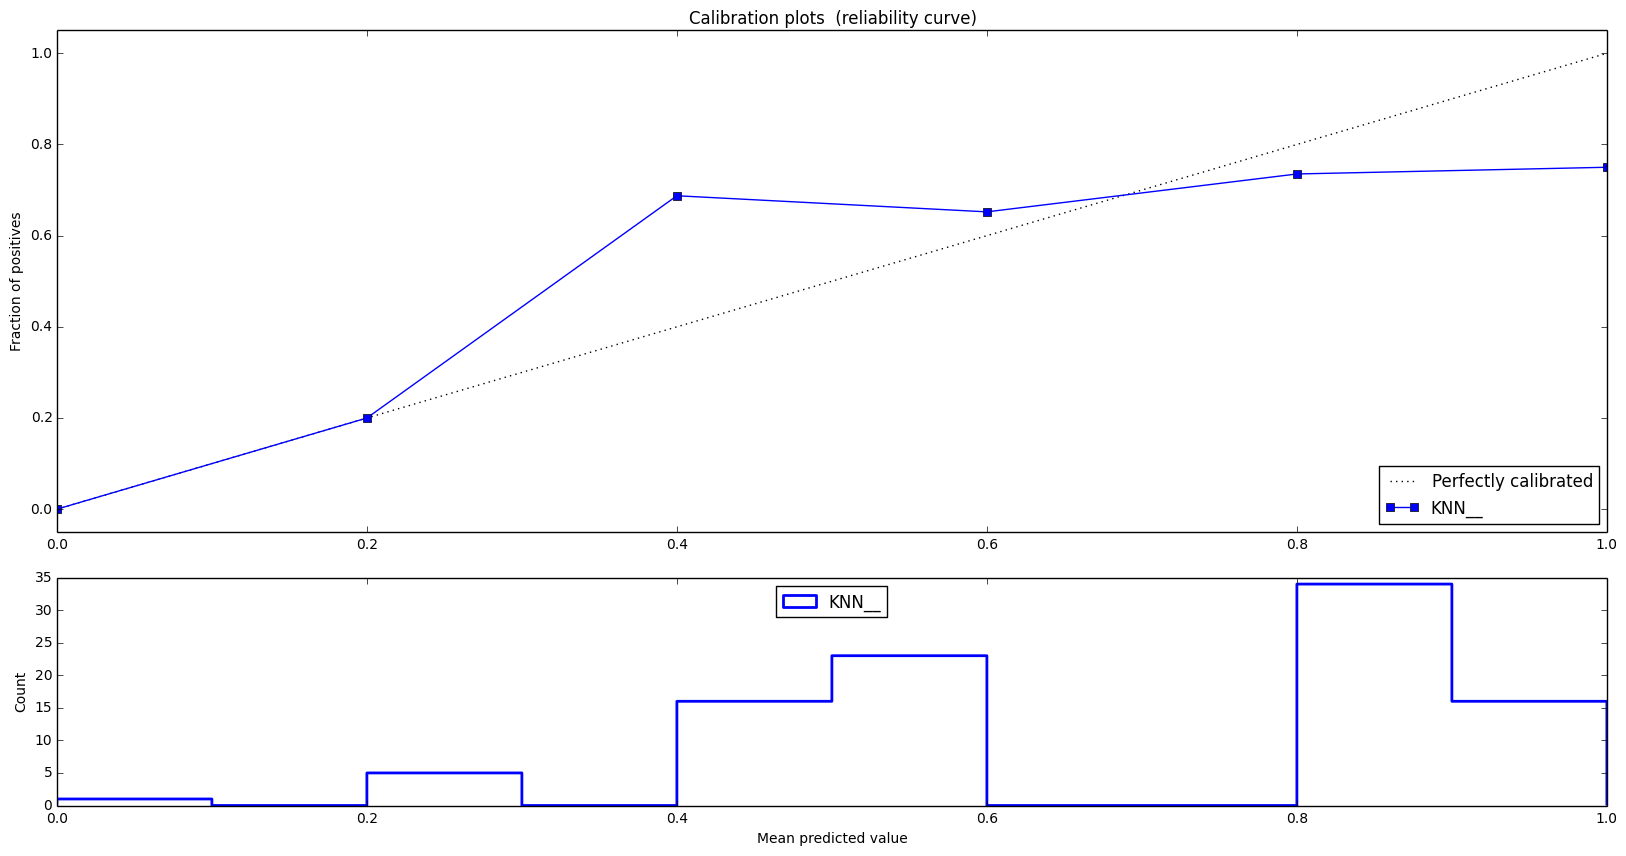

In [8]:
CLFRS.fitData(X_train,y_train,X_test,y_test,"KNN")

The KNN classifier shows a pretty decent fit. The predict_proba increases with the confidence level, for the most part. The F1_score is relatively high as well.

### 4. Stochastic Gradient Descent
Stochastic Gradient Descent works in the same way as the Minimum Least Squares fit but training time is much faster.

SGD:  =  : F1 score = 0.802631578947
SGD__


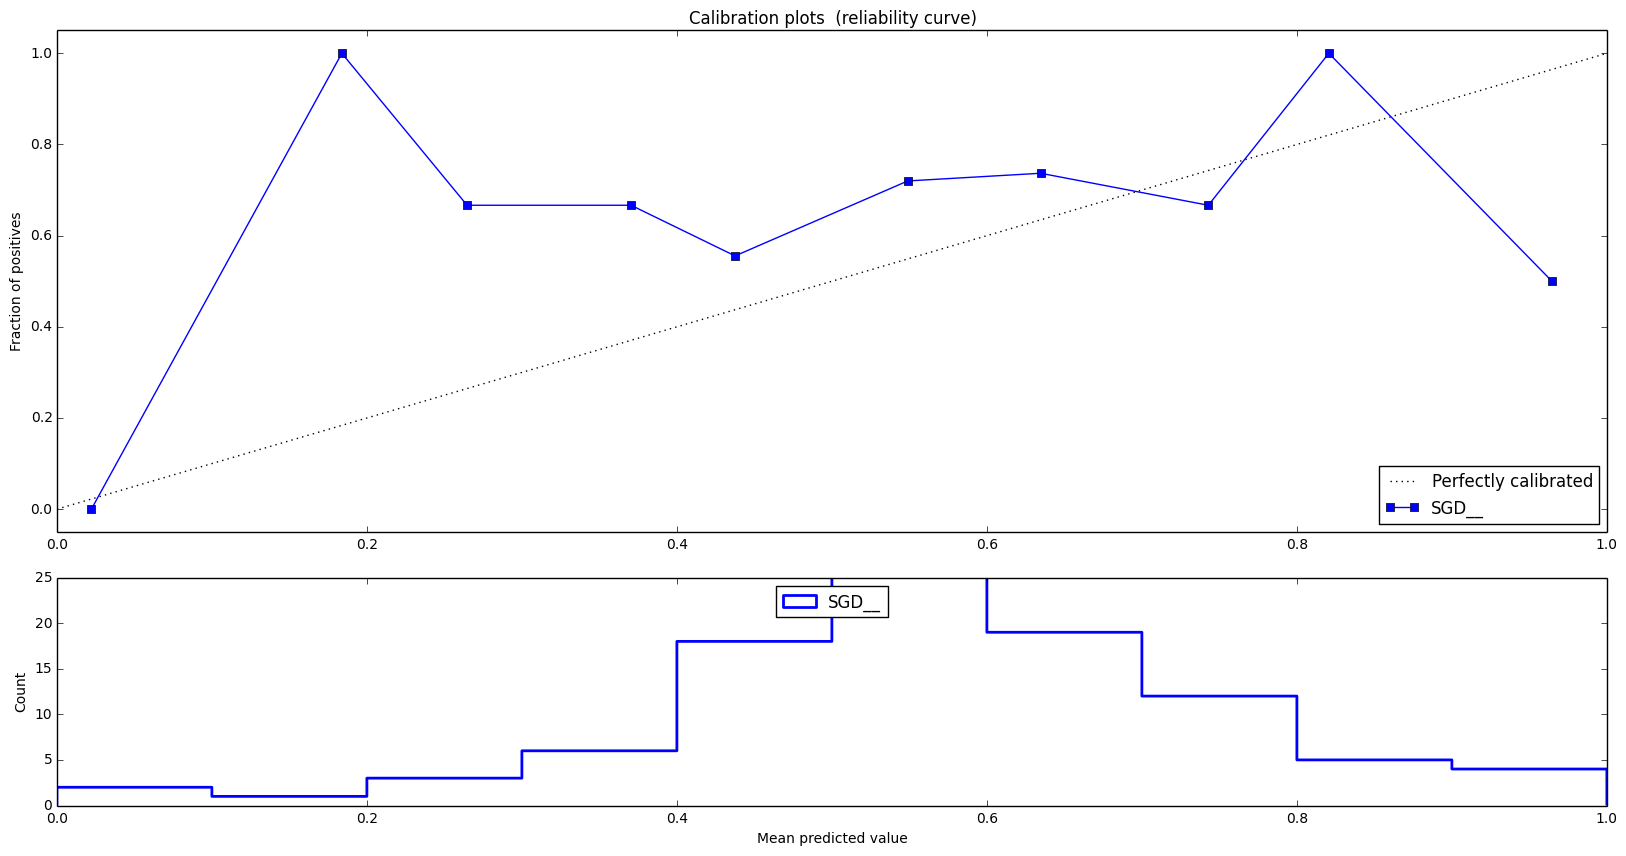

In [9]:
CLFRS.fitData(X_train,y_train,X_test,y_test,"SGD")

Stochastic Gradient Descent has a mediocre F1 score. the F1 score changes each run, and ranges from very low to moderately high (<0.75). This is not a suitable classifier for this problem

### 5. Support Vector Machines
SVM is a good classifier for this problem because SVMs operate well on high dimensional data, memory efficient and versatile with the choice of different kernels.

[[  0.   1.   1. ...,   1.   1.   0.]
 [  1.   0.   0. ...,   5.   1.  16.]
 [  1.   0.   1. ...,   1.   5.   0.]
 ..., 
 [  1.   0.   0. ...,   5.   5.   3.]
 [  1.   0.   0. ...,   1.   3.  12.]
 [  1.   0.   0. ...,   2.   1.   5.]]
SVM:  =  : F1 score = 0.802631578947
SVM__


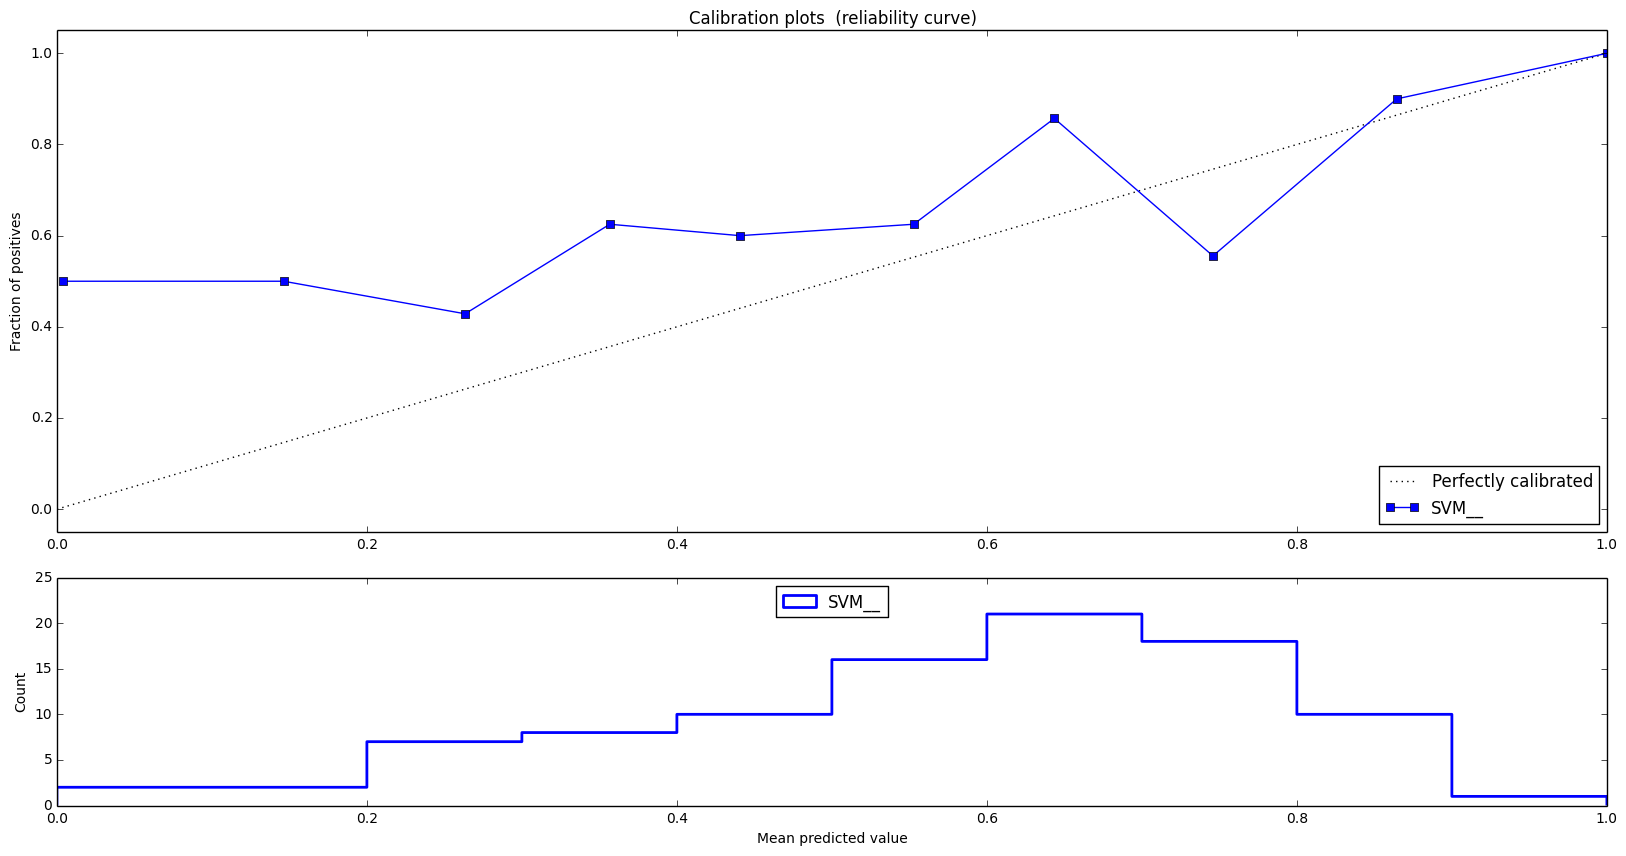

In [10]:
CLFRS.fitData(X_train,y_train,X_test,y_test,"SVM")

SVM shows a relatively high F1 score with the default RBF kernel. The calibration curve is pretty good, increasing confidence interval with increasing predict_proba values.

### 6. Logistic Regression
Logistic Regression is similar to Stochastic Gradient descent, except that the optimization problem is solved to minimize the square of the sum of the errors between the prediction and target in the training set. The training time is therefore much higher than that of Stochastic Gradient descent.

LogisticRegression:  =  : F1 score = 0.744525547445
LogisticRegression__


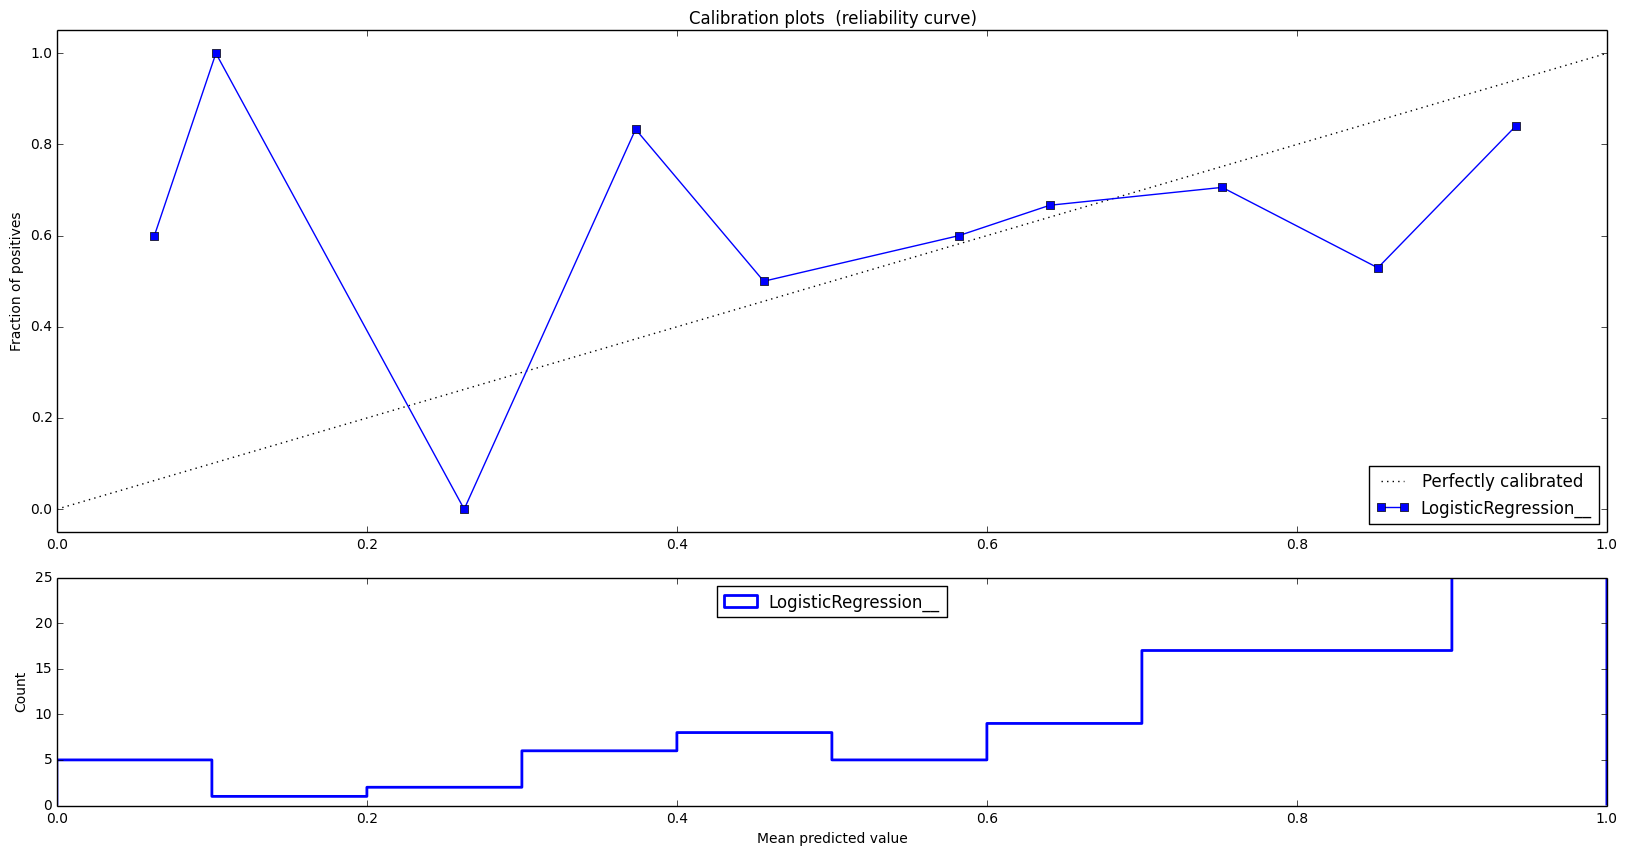

In [11]:
CLFRS.fitData(X_train,y_train,X_test,y_test,"LogisticRegression")

Logistic Regression has a better and consistent F1 score compare to SGD. Prediction probability also has a moderately consistent relationship with confidence interval.

### 7. Ensemble Learning with AdaBoost
Boosting through ensemble learning improves the fit of a base classifier. Here we try to perform the AdaBoost with the Decision Tree and Logistic Regression classifiers.

AdaBoost:  = DT : F1 score = 0.746478873239
AdaBoost__DT
AdaBoost:  = NB : F1 score = 0.65
AdaBoost__NB
AdaBoost:  = LogReg : F1 score = 0.753623188406
AdaBoost__LogReg


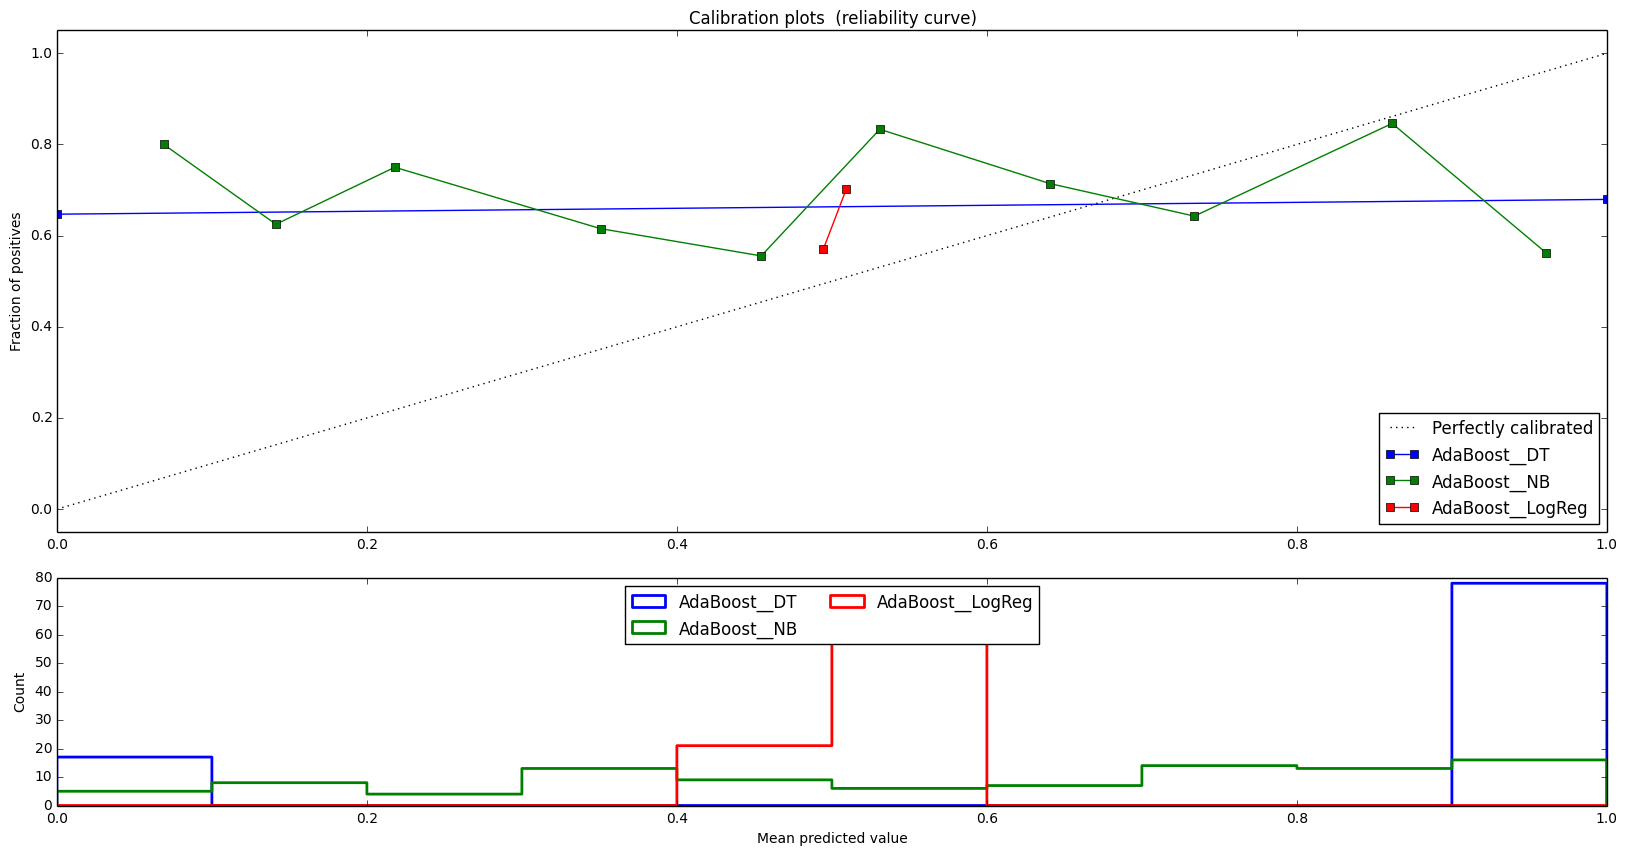

In [16]:
CLFRS.fitData(X_train,y_train,X_test,y_test,"AdaBoost")

### Question 2 - Model Application
*List three supervised learning models that are appropriate for this problem. For each model chosen*
- Describe one real-world application in industry where the model can be applied. *(You may need to do a small bit of research for this — give references!)* 
- What are the strengths of the model; when does it perform well? 
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

**Answer: **

From the above analysis, I would choose SVM, KNN and Ensemble with AdaBoost with the Decision tree as base classifier
1. SVM:
Real-world application: Classification of genetic diagnosis of cancer from gene sequences and drug discovery using SVMs (https://pdfs.semanticscholar.org/9a44/499b1fac5c30b237bbf241b685e9fc4f91ef.pdf)
Strengths: Operate well on high dimensional data, memory efficient and versatile with the choice of different kernels.
Weaknesses: Classifier needs to be re-trained with availability of new/fresh data.
Goodness of Classifier: This dataset has about with 300 training data each with 48 features. SVM is really good for training sets where number of training examples is more than the # of features. SVM also works well with high dimensional data (48 features).

2. KNN:
Real-world application: Breast Cancer diagnosis in hospitals (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2243774/pdf/procamiasymp00003-0794.pdf)
Strengths: Training time is lower. Classifier does not need to be re-trained with the availability of new/fresh data.
Weaknesses: Non-parametric model. So, higher memory requirement and slower run-time performance compared to parameteric classifiers.
Goodness of Classifier: Relatively small dataset with moderate number of features. KNN is very expressive and flexible in learning from the training set. Does not need to be re-trained when new data becomes available.

3. AdaBoost:
Real-world application: Remote-sensing applications (https://pdfs.semanticscholar.org/7db2/1481c37237dd9e2a2547c880917dd14740b0.pdf)
Strengths: Boosting tends to improve upon the prediction of base classifier most when they have high bias and
low variance. Examples of such models are Naive Bayes classifiers and decision trees of depth one.
Weaknesses: The base classifier has to be better than a random guess. (better than 50% accuracy). Places higher weights on noisy examples.
Goodness of Classifier: AdaBoost provides a better fit for the high-bias classifiers like the Naive-Bayes and Decision tree with just 1 node.  Boosting’s bias reduction comes from the way it adjusts its distribution over the training set. The examples that a base model misclassifies have their weights increased, causing the base model learning algorithm to focus more on those examples.



### Setup
Run the code cell below to initialize three helper functions which you can use for training and testing the three supervised learning models you've chosen above. The functions are as follows:
- `train_classifier` - takes as input a classifier and training data and fits the classifier to the data.
- `predict_labels` - takes as input a fit classifier, features, and a target labeling and makes predictions using the F<sub>1</sub> score.
- `train_predict` - takes as input a classifier, and the training and testing data, and performs `train_clasifier` and `predict_labels`.
 - This function will report the F<sub>1</sub> score for both the training and testing data separately.

In [17]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print "Trained model in {:.4f} seconds".format(end - start)

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print "Made predictions in {:.4f} seconds.".format(end - start)
    return f1_score(target.values, y_pred, pos_label='yes')


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print "Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print "F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train))
    print "F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test))

### Implementation: Model Performance Metrics
With the predefined functions above, you will now import the three supervised learning models of your choice and run the `train_predict` function for each one. Remember that you will need to train and predict on each classifier for three different training set sizes: 100, 200, and 300. Hence, you should expect to have 9 different outputs below — 3 for each model using the varying training set sizes. In the following code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `clf_A`, `clf_B`, and `clf_C`.
 - Use a `random_state` for each model you use, if provided.
 - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Create the different training set sizes to be used to train each model.
 - *Do not reshuffle and resplit the data! The new training points should be drawn from `X_train` and `y_train`.*
- Fit each model with each training set size and make predictions on the test set (9 in total).  
**Note:** Three tables are provided after the following code cell which can be used to store your results.

In [18]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# TODO: Initialize the three models
clf_A = SVC(random_state = 42)
clf_B = KNeighborsClassifier()
#clf_C = AdaBoostClassifier(GaussianNB(),n_estimators=100)
clf_C = AdaBoostClassifier(DecisionTreeClassifier())

# TODO: Set up the training set sizes
X_train_100,X_test_100,y_train_100,y_test_100 = train_test_split(X_all,y_all,test_size=0.72,stratify=y_all, random_state=1)

X_train_200,X_test_200,y_train_200,y_test_200 = train_test_split(X_all,y_all,test_size=0.48,stratify=y_all, random_state=1)

X_train_300,X_test_300,y_train_300,y_test_300 = train_test_split(X_all,y_all,test_size=0.24,stratify=y_all, random_state=1)


# TODO: Execute the 'train_predict' function for each classifier and each training set size
# train_predict(clf, X_train, y_train, X_test, y_test)
clf = [clf_A,clf_B,clf_C]
for i in clf:
    train_predict(i, X_train_100, y_train_100, X_test_100, y_test_100)
    train_predict(i, X_train_200, y_train_200, X_test_200, y_test_200)
    train_predict(i, X_train_300, y_train_300, X_test_300, y_test_300)    

Training a SVC using a training set size of 110. . .
Trained model in 0.0032 seconds
Made predictions in 0.0014 seconds.
F1 score for training set: 0.8706.
Made predictions in 0.0038 seconds.
F1 score for test set: 0.8139.
Training a SVC using a training set size of 205. . .
Trained model in 0.0044 seconds
Made predictions in 0.0036 seconds.
F1 score for training set: 0.8762.
Made predictions in 0.0032 seconds.
F1 score for test set: 0.8040.
Training a SVC using a training set size of 300. . .
Trained model in 0.0109 seconds
Made predictions in 0.0062 seconds.
F1 score for training set: 0.8701.
Made predictions in 0.0022 seconds.
F1 score for test set: 0.8026.
Training a KNeighborsClassifier using a training set size of 110. . .
Trained model in 0.0005 seconds
Made predictions in 0.0019 seconds.
F1 score for training set: 0.8256.
Made predictions in 0.0034 seconds.
F1 score for test set: 0.7740.
Training a KNeighborsClassifier using a training set size of 205. . .
Trained model in 0.00

### Tabular Results
Edit the cell below to see how a table can be designed in [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables). You can record your results from above in the tables provided.

** Classifer 1 - SVM**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |               0.0032          |          0.0038              |      0.8706            |          0.8139       |
| 200               |        0.0044         |            0.0032            |         0.8762         |                0.8040 |
| 300               |          0.0109               |          0.0022              |          0.8701        |    0.8026 |

** Classifer 2 - KNN**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |         0.0005                |            0.0034            |        0.8256          |  0.7740               |
| 200               |     0.0008             |           0.0034             |        0.8525          |          0.8042       |
| 300               |            0.0008             |             0.0032           |          0.8546        |     0.7591     |

** Classifer 3 - Ensemble with AdaBoost (Decision Tree)**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |             0.0030            |         0.0005               |            1.0      |          0.7311       |
| 200               |           0.0030             |          0.0005              |        1.0          |        0.6774         |
| 300               |             0.0038            |              0.0004          |         1.0         |     0.7194           |

## Choosing the Best Model
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F<sub>1</sub> score. 

### Question 3 - Choosing the Best Model
*Based on the experiments you performed earlier, in one to two paragraphs, explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?*

**Answer: **
The results in the above table suggest that Support Vector Classifier shows better accuracy for the test data than both KNN & boosting. While boosting takes a similar training and run time accuracy of algorithm is less compared to SVM. The perfect F1 score for the training set using AdaBoost is less critical than the score for the test set and might point to over-fitting as a result of the DecisionTreeClassifier used in AdaBoost.

KNN is slightly faster in prediction with similar accuracy compared to SVM. SVM is more memory efficient than KNN since SVM is a parametric. For a bigger training set, even though KNN takes less time to train, the memory needs may be prohibitive.

Thus, SVM is the better algorithm for this model since it has the best accuracy and is more memory efficient while making moderately fast prediction on new data. SVM is also the only one of the three that has a relatively constant accuracy with varying number of training points. This shows that SVM is very good at classification even when the number of training data points is limited (as long as the number of training points is larger than the number of features).

### Question 4 - Model in Layman's Terms
*In one to two paragraphs, explain to the board of directors in layman's terms how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical or technical jargon, such as describing equations or discussing the algorithm implementation.*

**Answer: **
The data collected is organized into 48 features. The collected data is divided into two sets - one for training and the other for testing. An important requirement in dividing between the training and testing sets is that the number of points in the training set should be much higher than the number of features. 

A supervised learning algorithm based on support vector machine is used to train the training dataset. The support vector classifier (SVC) identifies patterns in the features of the training dataset that clearly point out the pass/fail status of a student. It does so, by maximizing the boundary (in each feature) between the passed and failed categories. Once this boundary is identified for each feature, the training is complete.

In addition, SVM not only works well where the labels are a linear function of the features, but also in cases where the relationship between features and labels is complex (eg. nonlinear). In this scenario, svm can be employed with the kernel trick where the kernel corresponding to some feature mapping function is valid if the kernel matrix defined as the the dot product of the feature mapping function is symmetric positive semidefinite. This trick allows a variety of kernels to be used to better express the relationship between the features and labels.

To test the precision of the SVC, the learning algorithm is passed the test dataset without the labels. The prediction made by the algorithm on the testing dataset is compared with the corresponding labels. The accuracy is measure using a metric called F1 score that is a measure of the % of total true positive and true negative predictions.

If the accuracy is good, the algorithm is ready to make predictions on new data. To improve the prediction accuracy, we could either:
1. Tune the model with a grid search of the parameters to the SVC
2. Collect and supply the algorithm with more training data.
3. Calibrate the algorithm so that the prediction probability is linear in relationship to the confidence level of prediction.

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
- Initialize the classifier you've chosen and store it in `clf`.
- Create the F<sub>1</sub> scoring function using `make_scorer` and store it in `f1_scorer`.
 - Set the `pos_label` parameter to the correct value!
- Perform grid search on the classifier `clf` using `f1_scorer` as the scoring method, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_obj`.

In [19]:
# TODO: Import 'GridSearchCV' and 'make_scorer'
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score

# TODO: Create the parameters list you wish to tune
parameters = {'kernel':['sigmoid','rbf','linear'], 'C': [1,5,10], 'gamma':[0.01,0.001,0.04]};

# TODO: Initialize the classifier
clf = SVC()

# TODO: Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score, pos_label="yes")

# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(clf, parameters, f1_scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj.fit(X_train,y_train)

# Get the estimator
clf = grid_obj.best_estimator_
print grid_obj.best_params_

# Report the final F1 score for training and testing after parameter tuning
print "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train))
print "Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, X_test, y_test))

{'kernel': 'rbf', 'C': 1, 'gamma': 0.04}
Made predictions in 0.0058 seconds.
Tuned model has a training F1 score of 0.9157.
Made predictions in 0.0019 seconds.
Tuned model has a testing F1 score of 0.8267.


### Question 5 - Final F<sub>1</sub> Score
*What is the final model's F<sub>1</sub> score for training and testing? How does that score compare to the untuned model?*

**Answer: **
In the grid search, I changed the penalty C, kernel coefficient gamme and the kernel itself. The grid search was able to identify the radial basis function as the most suitable between sigmoid and linear with a penalty value of C = 1 (default value) and the kernel coefficient of 0.04 (approx. twice the default value of 1/# features).

Note that the final F1 score for both the training and testing data have improved.

Final F1_score = 0.8267.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.